# Ensembling of simple CNN models to get best possible accuracy for MNIST fashion dataset(Report 3, with batch normalization)

Importing required libraries

In [ ]:
import tensorflow as tf
from numpy import unique, argmax
from keras.datasets import fashion_mnist
from keras import Sequential
from keras.layers import Conv2D, Dense, Flatten, BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np   


Loading the MNIST fashion dataset and reshaping the training and testing images 

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

4431872/4422102 [==============================] - 0s 0us/step


Shape of input, output training and testing images

In [ ]:
print('Fashion MNIST Dataset Shape:')
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))


Fashion MNIST Dataset Shape:
X_train: (60000, 28, 28, 1)
Y_train: (60000,)
X_test:  (10000, 28, 28, 1)
Y_test:  (10000,)


Normalization of input images 

In [ ]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

Label number & respective images 

Label        	Description

0	  -T-shirt/top

1-Trowser

2-	Pullover

3-	Dress

4-	Coat

5	-Sandal

6-	Shirt

7	-Sneaker

8-	Bag

9-	Ankle Boot

visualization of input images from training mnist fashion dataset

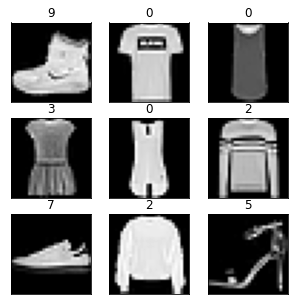

In [ ]:
fig = plt.figure(figsize=(5,5))
for i in range(9):
  ax = fig.add_subplot(3,3, i+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(x_train[i]), cmap='gray')
  ax.set_title(y_train[i])


Model 1 (Name-M3, boz of 3*3 kernel size ), having 10 conv. layers followed by batchnormalization and final output layer 

In [ ]:
model1 = Sequential()

model1.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model1.add(BatchNormalization())


model1.add(Conv2D(48, (3,3), activation='relu'))
model1.add(BatchNormalization())


model1.add(Conv2D(64, (3,3), activation='relu'))
model1.add(BatchNormalization())


model1.add(Conv2D(80, (3,3), activation='relu'))
model1.add(BatchNormalization())



model1.add(Conv2D(96, (3,3), activation='relu'))
model1.add(BatchNormalization())



model1.add(Conv2D(112, (3,3), activation='relu'))
model1.add(BatchNormalization())



model1.add(Conv2D(128, (3,3), activation='relu'))
model1.add(BatchNormalization())


model1.add(Conv2D(144, (3,3), activation='relu'))
model1.add(BatchNormalization())


model1.add(Conv2D(160, (3,3), activation='relu'))
model1.add(BatchNormalization())



model1.add(Conv2D(176, (3,3), activation='relu'))
model1.add(BatchNormalization())



model1.add(Flatten())

model1.add(Dense(10, activation='softmax'))


Compiling the model 1 ,summary and model 1 architecture  

Epoch 1/5
268/268 - 39s - loss: 0.0124 - accuracy: 0.9963 - 39s/epoch - 147ms/step
Epoch 2/5
268/268 - 38s - loss: 0.0080 - accuracy: 0.9980 - 38s/epoch - 143ms/step
Epoch 3/5
268/268 - 38s - loss: 0.0043 - accuracy: 0.9992 - 38s/epoch - 143ms/step
Epoch 4/5
268/268 - 38s - loss: 0.0015 - accuracy: 0.9999 - 38s/epoch - 143ms/step
Epoch 5/5
268/268 - 38s - loss: 0.0024 - accuracy: 0.9996 - 38s/epoch - 143ms/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 48)        13872     
                                     

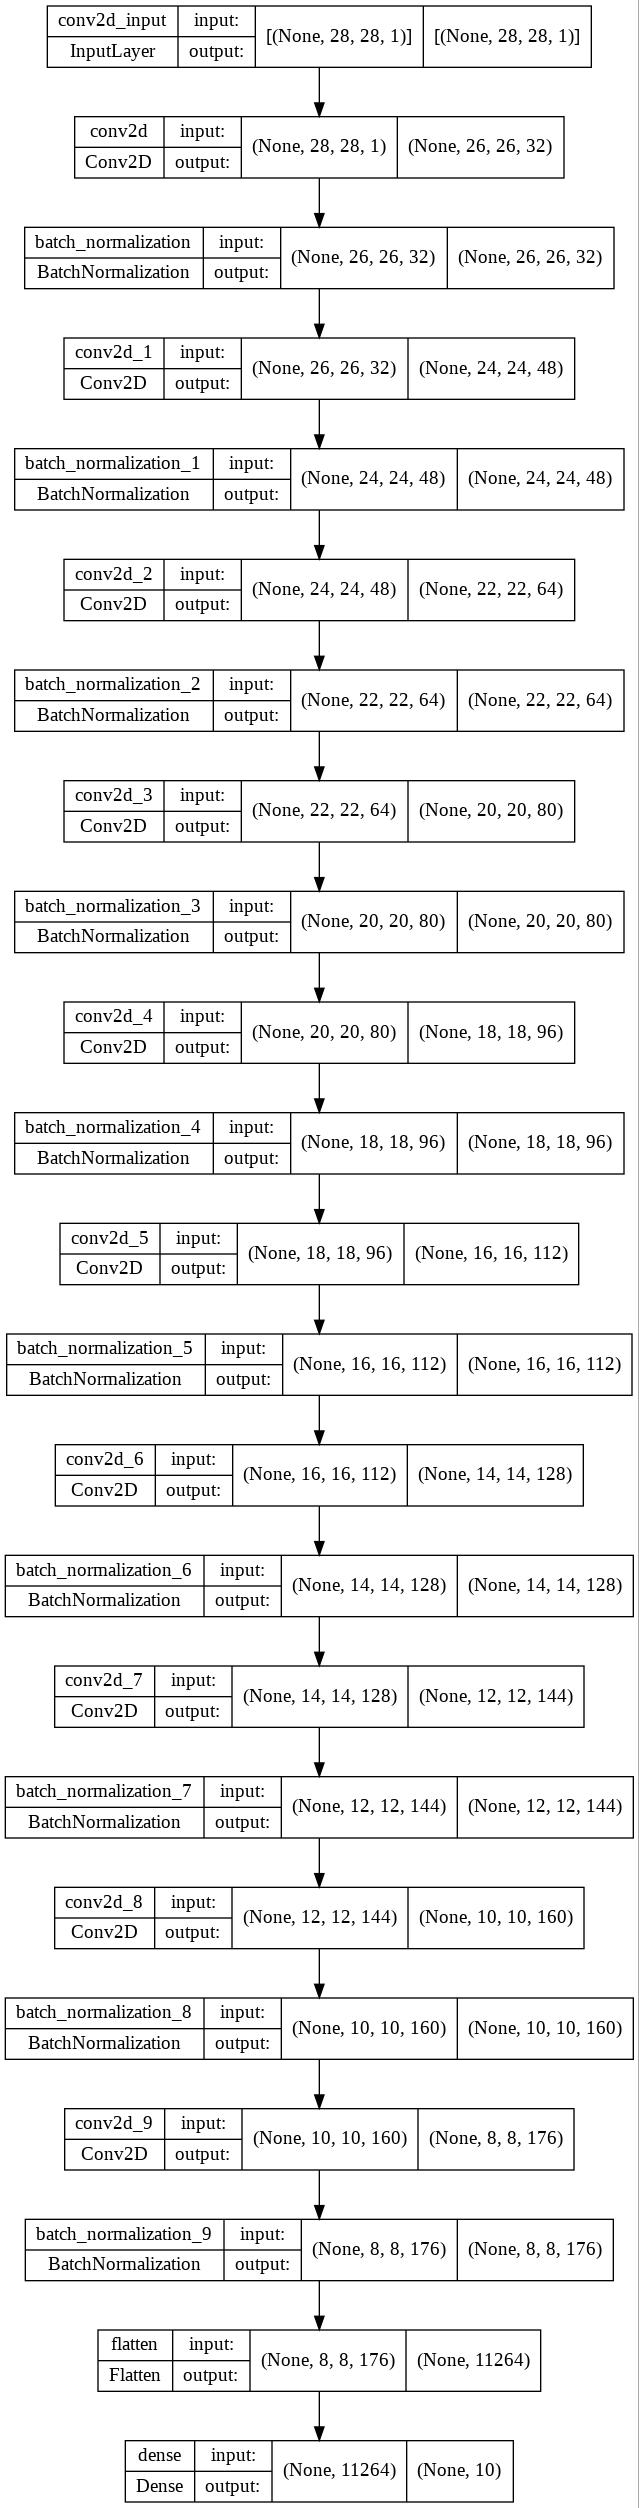

In [ ]:
model1.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history1 = model1.fit(x_train, y_train, epochs=5, batch_size=224, verbose=2, validation_split=None)

model1.summary()
model1.save('saved_models/model1.hdf5')
plot_model(model1, 'model1.jpg', show_shapes=True)

Model 2 (Name-M5, boz of 5*5 kernel size ), having 5 conv. layers followed by batchnormalization and final output layer

In [ ]:
model2 = Sequential()

model2.add(Conv2D(32, (5,5), activation='relu', input_shape=(28,28,1)))
model2.add(BatchNormalization())


model2.add(Conv2D(64, (5,5), activation='relu'))
model2.add(BatchNormalization())


model2.add(Conv2D(96, (5,5), activation='relu'))
model2.add(BatchNormalization())


model2.add(Conv2D(128, (5,5), activation='relu'))
model2.add(BatchNormalization())



model2.add(Conv2D(160, (5,5), activation='relu'))
model2.add(BatchNormalization())

model2.add(Flatten())

model2.add(Dense(10, activation='softmax'))



Compiling the model 2 ,summary and model 2 architecture

Epoch 1/5
264/264 - 20s - loss: 0.0091 - accuracy: 0.9975 - 20s/epoch - 78ms/step
Epoch 2/5
264/264 - 18s - loss: 0.0079 - accuracy: 0.9981 - 18s/epoch - 69ms/step
Epoch 3/5
264/264 - 18s - loss: 0.0028 - accuracy: 0.9996 - 18s/epoch - 70ms/step
Epoch 4/5
264/264 - 19s - loss: 0.0022 - accuracy: 0.9997 - 19s/epoch - 70ms/step
Epoch 5/5
264/264 - 19s - loss: 0.0013 - accuracy: 0.9998 - 19s/epoch - 70ms/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 batch_normalization_10 (Bat  (None, 24, 24, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 20, 20, 64)        51264     
                                        

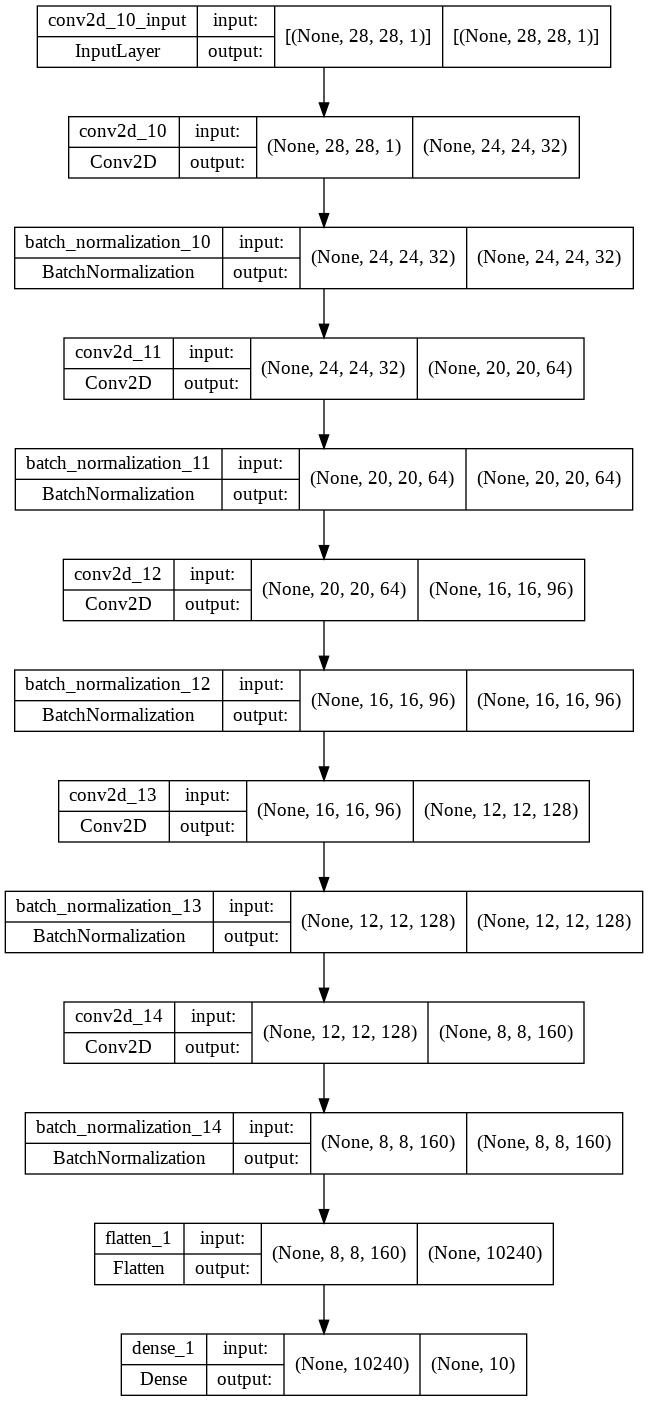

In [ ]:
model2.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(x_train, y_train, epochs=5, batch_size=228, verbose=2, validation_split=None)

model2.summary()
model2.save('saved_models/model2.hdf5')
plot_model(model2, 'model2.jpg', show_shapes=True)

Model 3 (Name-M7, boz of 7*7 kernel size ), having 4 conv. layers followed by batchnormalization and final output layer

In [ ]:
model3 = Sequential()

model3.add(Conv2D(48, (7,7), activation='relu', input_shape=(28,28,1)))
model3.add(BatchNormalization())


model3.add(Conv2D(96, (7,7), activation='relu'))
model3.add(BatchNormalization())


model3.add(Conv2D(144, (7,7), activation='relu'))
model3.add(BatchNormalization())


model3.add(Conv2D(192, (7,7), activation='relu'))
model3.add(BatchNormalization())

model3.add(Flatten())

model3.add(Dense(10, activation='softmax'))



Compiling the model 3 ,summary and model 3 architecture

Epoch 1/5
264/264 - 20s - loss: 0.0172 - accuracy: 0.9952 - 20s/epoch - 74ms/step
Epoch 2/5
264/264 - 18s - loss: 0.0135 - accuracy: 0.9967 - 18s/epoch - 67ms/step
Epoch 3/5
264/264 - 18s - loss: 0.0060 - accuracy: 0.9986 - 18s/epoch - 68ms/step
Epoch 4/5
264/264 - 18s - loss: 0.0075 - accuracy: 0.9981 - 18s/epoch - 69ms/step
Epoch 5/5
264/264 - 18s - loss: 0.0107 - accuracy: 0.9971 - 18s/epoch - 68ms/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 22, 22, 48)        2400      
                                                                 
 batch_normalization_15 (Bat  (None, 22, 22, 48)       192       
 chNormalization)                                                
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 96)        225888    
                                        

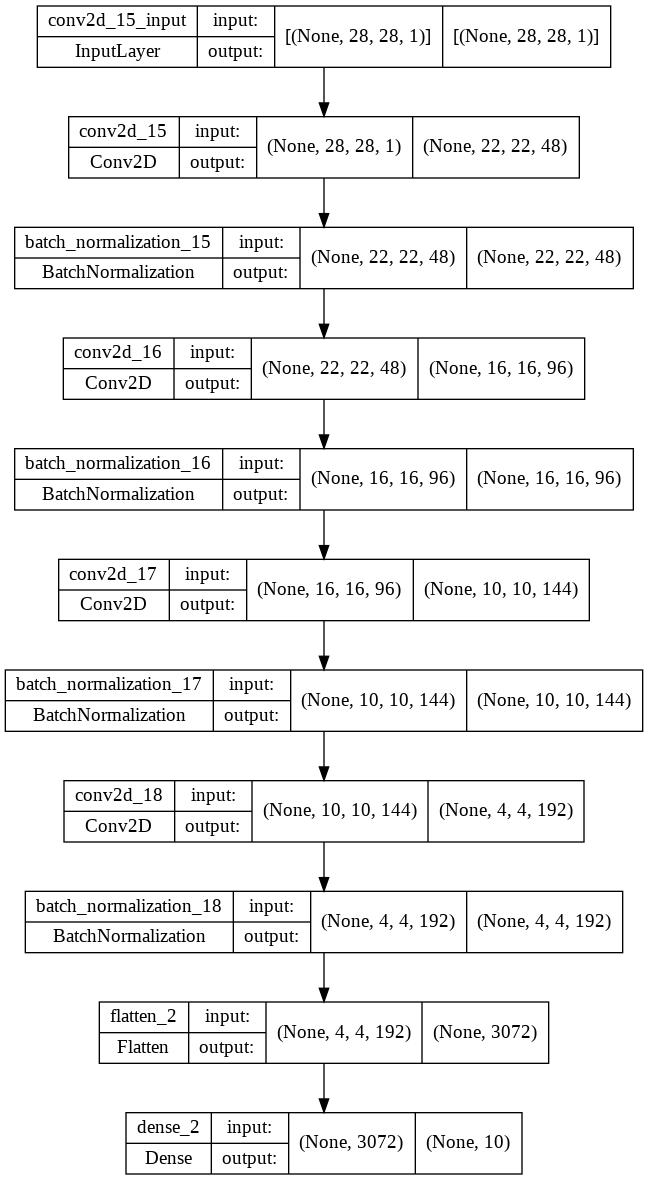

In [ ]:
model3.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history3 = model3.fit(x_train, y_train, epochs=5, batch_size=228, verbose=2, validation_split=None)

model3.summary()
model3.save('saved_models/model3.hdf5')
plot_model(model3, 'model3.jpg', show_shapes=True)

Ensembling 1 => M3+M3+M3 

Ensembling 2 => M5+M5+M5 

Ensembling 3 => M7+M7+M7 

Ensembling 4 => M3+M5+M7

printing the accuracies for all 3 models M3, M5 and M7 separately and also accuracies for ensembling 1, 2, 3 and 4 for test mnist fashion data 




In [ ]:
from keras.models import load_model
from sklearn.metrics import accuracy_score

model1 = load_model('saved_models/model1.hdf5')      # loading the saved models
model2 = load_model('saved_models/model2.hdf5')
model3 = load_model('saved_models/model3.hdf5')


models1 = [model1, model1, model1]
models2 = [model2, model2, model2]
models3 = [model3, model3, model3]
models4 = [model1, model2, model3]


preds1 = [model.predict(x_test) for model in models1]
preds1=np.array(preds1)             # converting pred. into array
summed1= np.sum(preds1, axis=0)         # adding pred. of diff. models

ensemble_prediction1 = np.argmax(summed1, axis=1)    # prediction 

preds2 = [model.predict(x_test) for model in models2]
preds2=np.array(preds2)
summed2 = np.sum(preds2, axis=0)

ensemble_prediction2 = np.argmax(summed2, axis=1)

preds3 = [model.predict(x_test) for model in models3]
preds3=np.array(preds3)
summed3 = np.sum(preds3, axis=0)

ensemble_prediction3 = np.argmax(summed3, axis=1)

preds4 = [model.predict(x_test) for model in models4]
preds4=np.array(preds4)
summed4 = np.sum(preds4, axis=0)

ensemble_prediction4 = np.argmax(summed4, axis=1)


loss, accuracy1= model1.evaluate(x_test, y_test, verbose=0.0 )
loss, accuracy2= model2.evaluate(x_test, y_test, verbose=0.0 )
loss, accuracy3= model3.evaluate(x_test, y_test, verbose=0.0 )

ensemble_accuracy1= accuracy_score(y_test, ensemble_prediction1)
ensemble_accuracy2= accuracy_score(y_test, ensemble_prediction2)
ensemble_accuracy3= accuracy_score(y_test, ensemble_prediction3)
ensemble_accuracy4= accuracy_score(y_test, ensemble_prediction4)

# printing all accuracies together

print('Accuracy of model 1:', accuracy1*100)

print('Accuracy of model 2:', accuracy2*100)

print('Accuracy of model 3:', accuracy3*100)

print('Accuracy of ensemble(M3+M3+M3) is:', ensemble_accuracy1*100)

print('Accuracy of ensemble(M5+M5+M5) is:', ensemble_accuracy2*100)

print('Accuracy of ensemble(M7+M7+M7) is:', ensemble_accuracy3*100)

print('Accuracy of ensemble(M3+M5+M7) is:', ensemble_accuracy4*100)



Accuracy of model 1: 91.79999828338623
Accuracy of model 2: 89.410001039505
Accuracy of model 3: 89.10999894142151
Accuracy of ensemble(M3+M3+M3) is: 91.8
Accuracy of ensemble(M5+M5+M5) is: 89.41
Accuracy of ensemble(M7+M7+M7) is: 89.11
Accuracy of ensemble(M3+M5+M7) is: 92.03


Previously we did ensembling for M3+M5+M7 but with equal weightage to all 3 models and now we will ensemble by giving best possible weights to all 3 models M3, M5 and M7 and find the test accuracy and we will compare it with results of ensembling 4 

In [ ]:
models4 = [model1, model2, model3]

preds4 = [model.predict(x_test) for model in models4]
preds4=np.array(preds4)
weights=[0.8, 0.2, 0.2]      # providing weightage to M3, M5 and M7 

weighted_preds=np.tensordot(preds4, weights, axes=((0),(0)))
weighted_ensemble_prediction =np.argmax(weighted_preds, axis=1)

weighted_accuracy=accuracy_score(y_test, weighted_ensemble_prediction)

#  printing all the various accuracies again 

print('Accuracy of model 1:', accuracy1*100)

print('Accuracy of model 2:', accuracy2*100)

print('Accuracy of model 3:', accuracy3*100)

print('Accuracy of ensemble(M3+M5+M7) is:', ensemble_accuracy4*100)

print('Accuracy of weighted ensemble(0.8*M3+0.2*M5+0.2*M7) is:', weighted_accuracy*100)



Accuracy of model 1: 91.79999828338623
Accuracy of model 2: 89.410001039505
Accuracy of model 3: 89.10999894142151
Accuracy of ensemble(M3+M5+M7) is: 92.03
Accuracy of weighted ensemble(0.8*M3+0.2*M5+0.2*M7) is: 92.13


Summary-- In report 3 it is said that, ensembling of different models can give you the better accuracy relative to accuracies of individual models and it is exactly what i showed in this code for the paper that we choose for our term project, as u can see accuracy of ensemble 4 if more than any individual model ( M3, M5 and M7) and further accuracy of weighted ensemble is better than all remaining and in each model batch normalization is done after each layer and then reults are produced

Data -> MNIST fashion dataset 

Note-> if u don't get the same accuracies as shown above please train the models again and again by changing the learning rate boz i experinced the same thing when i run the code after some days, I changed the lr values to 1e-3, 1e-4, 1e-6 and finaly the values given above.

Also run the code in one go , boz the models which are saved in the folder of COLAB are temporary, they just vanish after some time or if u only run the code partially and remaining code after some time.

Also if u find any error/problem/dicrepancy b/w results of this code and results u are getting during runing the code please contact me  

